## Microsoft project
## Willy Angole

##  Business Understanding

#### *Finding the best time of the year to release movies 
#### *Finding the best selling movie genre
#### *Finding languange with high prevalence in moves
#### *Finding writers and directors who have wrote many movies

In [1]:
#importing pandas alias
import pandas as pd
import numpy as np

  ## 1.Data analysis for best selling movies and release time

In [2]:
#load data for movie budget and release time and display the first five
budget = pd.read_csv("zippedData/tn.movie_budgets.csv")
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
#display the last five
budget.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [4]:
#check the budget data information
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
#Checking for any missing values in the budget data
missing_values = budget.isnull().sum().sort_values(ascending = False)
missing_values

worldwide_gross      0
domestic_gross       0
production_budget    0
movie                0
release_date         0
id                   0
dtype: int64

##### There are no missing values in our data.

In [6]:
#convert release date datatype to object in order to extract for visualisation purpose
budget['release_date'] = pd.to_datetime\
                        (budget['release_date'])

In [7]:
#change datatype of the budget and gross columns to int64
budget[budget.columns[3:]] \
        = budget[budget.columns[3:]]\
        .apply(lambda x: x.str.replace('$',''))\
        .apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [8]:
#create a column of profit to enable you to see the best selling movie
budget['movie_profit'] = budget['worldwide_gross'] - budget['production_budget']

In [9]:
#create month column so that we can plot it against movie profit
budget['release_month'] = pd.DatetimeIndex(budget['release_date']).month

In [10]:
#check for duplicates
budget_duplicate = len(budget[budget.duplicated()])
budget_duplicate

0

In [11]:
#preview to see all the columns created
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12


##                      Visualisation for profit agaist release month

In [12]:
#import seaborn for ploting
import seaborn as sns
#import matplotlib library for easy plotting
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

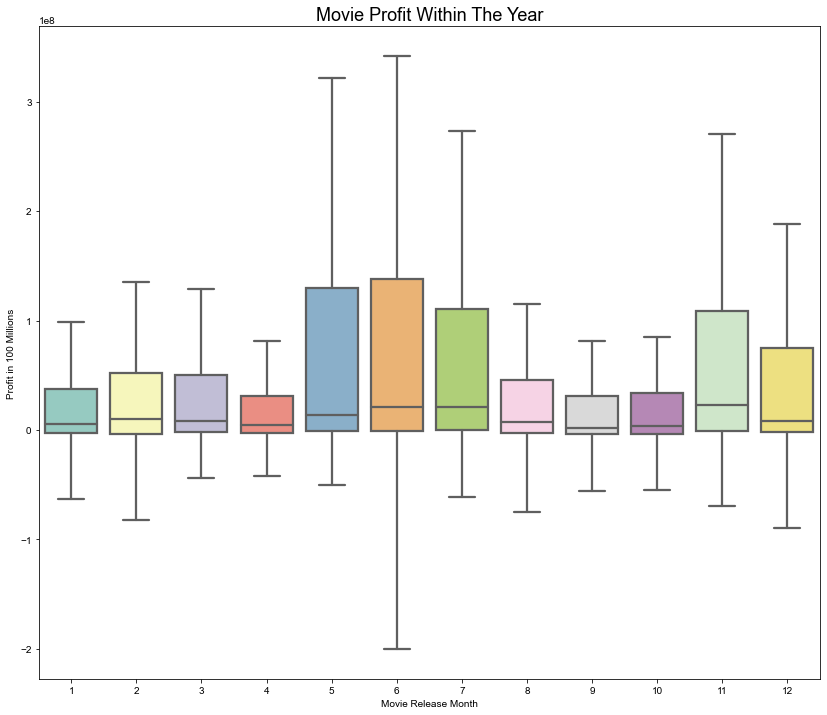

In [13]:
#create a boxplot using release month and profit
x = budget['release_month']
y = budget['movie_profit']
fig, ax = plt.subplots(figsize=(14,12))
sns.set_style('darkgrid')
sns.set_context('talk') 
sns.boxplot(x, y, palette='Set3', showfliers=False)
plt.title('Movie Profit Within The Year')
plt.ylabel('Profit in 100 Millions')
plt.xlabel('Movie Release Month') 
plt.show()

#### from the above boxplot we can see that there are high profit during mid year and at the end of the year

##### Visualising data using vertical bar graph

Text(0.5, 1.0, 'Movie Profit Within The Year')

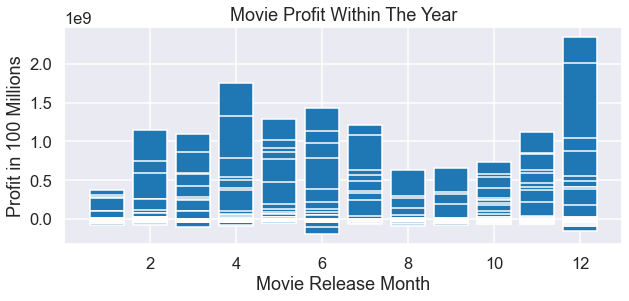

In [14]:
fig, ax = plt.subplots(figsize =(10,4))
x = budget['release_month']
y = budget['movie_profit']

ax.bar(x, y)

ax.set_ylabel('Profit in 100 Millions')
ax.set_xlabel('Movie Release Month')

ax.set_title('Movie Profit Within The Year')

#### visualising using regplot

<AxesSubplot:xlabel='release_month', ylabel='movie_profit'>

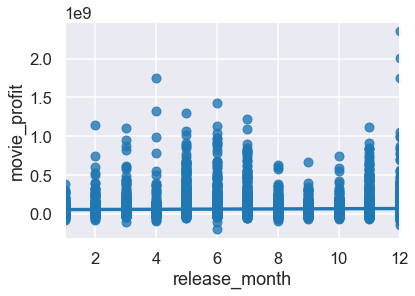

In [15]:
sns.regplot(x=x, y=y)

### From above visualisations, it is evident that there is high profit yielded in the month of april, may, june and december. This can be the best time to release movies

## 2.Analysing languages that have high prevalence of selling

In [16]:
#import sqlite3 in order to connect to the database
import sqlite3

conn = sqlite3.connect("zippedData/im.db")
cur = conn.cursor()

In [17]:
cur.execute(""" SELECT name FROM sqlite_master WHERE type = "table"; """)

In [18]:
#viewing all the available tables
table_name = cur.fetchall()
table_name

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',),
 ('movie_info',)]

In [19]:
#vieving the first five rows
moving_ratings = pd.read_sql(""" 
SELECT *
FROM movie_ratings;
""", conn)
moving_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [20]:
#viewing the first five rows
movie_basics = pd.read_sql(""" 
SELECT *
FROM movie_basics;
""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
#join average rating and grenres to get data of interest
#get the first five rows
genre_rating =pd.read_sql("""
SELECT genres, averagerating
FROM movie_ratings
JOIN movie_basics
USING(movie_id);
""", conn)
genre_rating.head()

,genres,averagerating
0,Romance,8.3
1,Documentary,8.9
2,Drama,6.4
3,"Action,Adventure,Fantasy",4.2
4,"Mystery,Thriller",6.5


In [22]:
#getting infromation therein
genre_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         73052 non-null  object 
 1   averagerating  73856 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


In [23]:
#finding missing values
missing_values = genre_rating.isnull().sum().sort_values(ascending = False)
missing_values

genres           804
averagerating      0
dtype: int64

In [24]:
#Check the total number of rows and columns in the dataframe
genre_rating.shape

(73856, 2)

In [25]:
#drop rows with missing values
genre_rating.dropna(inplace=True)

In [26]:
#New rows and columns
genre_rating.shape

(73052, 2)

In [27]:
#Remove white space 
genre_rating['genres'] = genre_rating['genres'].apply(lambda x: x.split(","))

In [28]:
#loop ove the genre and match it with indexes
for index, row in genre_rating.iterrows():
    if row['genres']:
        for genre in row['genres']:
            genre_rating.loc[index, genre] = 1

In [29]:
#Displaying the genre
cols = list(genre_rating.columns[10:])
cols

['Comedy',
 'Biography',
 'Sport',
 'War',
 'Sci-Fi',
 'Animation',
 'Crime',
 'History',
 'Horror',
 'Music',
 'Family',
 'Musical',
 'News',
 'Western',
 'Reality-TV',
 'Adult',
 'Game-Show',
 'Short']

In [30]:
#create dictionary of genres and counts as i:j pairings using for loop to 
#find the sum for bools for each genre
genre_and_count_dict = {}
for col in cols:
    count = genre_rating[col].sum() 
    genre_and_count_dict[col] = count
genre_and_count_dict

{'Comedy': 17290.0,
 'Biography': 3809.0,
 'Sport': 1179.0,
 'War': 853.0,
 'Sci-Fi': 2206.0,
 'Animation': 1743.0,
 'Crime': 4611.0,
 'History': 2825.0,
 'Horror': 7674.0,
 'Music': 1968.0,
 'Family': 3412.0,
 'Musical': 721.0,
 'News': 579.0,
 'Western': 280.0,
 'Reality-TV': 17.0,
 'Adult': 3.0,
 'Game-Show': 2.0,
 'Short': 1.0}

In [31]:
#sort dictionary values 
sorted_dict = sorted(genre_and_count_dict.values(), reverse=True)[9]
top_10_genre_and_count_dict = {k: v for k, v in genre_and_count_dict.items() 
                                if v >= sorted_dict}
sorted_dict

1179.0

In [32]:
#display top 10 genre
top_10_genre_and_count_dict

{'Comedy': 17290.0,
 'Biography': 3809.0,
 'Sport': 1179.0,
 'Sci-Fi': 2206.0,
 'Animation': 1743.0,
 'Crime': 4611.0,
 'History': 2825.0,
 'Horror': 7674.0,
 'Music': 1968.0,
 'Family': 3412.0}

In [33]:
#listinsting top 10 counts for plotting
x_genre_count = list(top_10_genre_and_count_dict.keys())
y_genre_count = list(top_10_genre_and_count_dict.values())

## Visualising  the top 10 liked genres

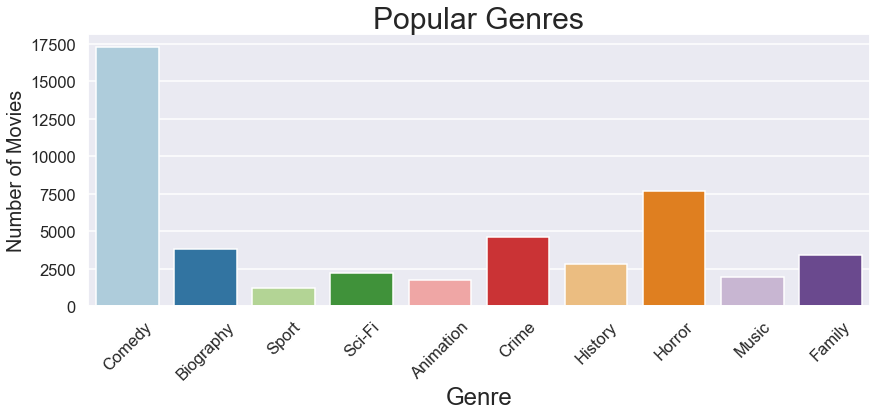

In [34]:
fig, ax = plt.subplots(figsize=(14,5))
sns.axes_style('darkgrid')
sns.set_context('talk') 
sns.barplot(x_genre_count, y_genre_count,palette='Paired')
plt.title('Popular Genres', fontsize=30)
plt.xticks(rotation=45)
plt.ylabel('Number of Movies', fontsize=20)
plt.xlabel('Genre', fontsize=24) 
plt.show()


#### Based on the above visualisation it is evident that the most popular genre of movies is comedy.  Then horror and family

## 3.Finding out the best movie writers and directors

In [35]:
#load the movie info data and display the first five rows
movie_info = pd.read_csv("zippedData/rt.movie_info.tsv", sep="\t")
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [36]:
#view the last five
movie_info.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [37]:
#checking data types of the data
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [38]:
#finding misssing values in the data
missing_val = movie_info.isnull().sum().sort_values(ascending=False)
missing_val

box_office      1220
currency        1220
studio          1066
writer           449
dvd_date         359
theater_date     359
director         199
synopsis          62
runtime           30
genre              8
rating             3
id                 0
dtype: int64

In [39]:
#current rows and columns before cleaning the data
movie_info.shape

(1560, 12)

In [40]:
#select witer, director and genre columns and display the first five rows
cur.execute("""
SELECT writer, director, genre
FROM movie_info
""")

new = pd.DataFrame(cur.fetchall())
new.columns = [i[0] for i in cur.description]
new.head()

,writer,director,genre
0,Ernest Tidyman,William Friedkin,Action and Adventure|Classics|Drama
1,David Cronenberg|Don DeLillo,David Cronenberg,Drama|Science Fiction and Fantasy
2,Allison Anders,Allison Anders,Drama|Musical and Performing Arts
3,Paul Attanasio|Michael Crichton,Barry Levinson,Drama|Mystery and Suspense
4,Giles Cooper,Rodney Bennett,Drama|Romance


In [41]:
#check missing values
missing = new.isnull().sum().sort_values(ascending=False)
missing

writer      449
director    199
genre         8
dtype: int64

### Find the most appearing writer, director and genre to fill in the missing data

In [42]:
#most appearing director
new['director'].value_counts().idxmax()

'Steven Spielberg'

In [43]:
#most appearing writer
new['writer'].value_counts().idxmax()

'Woody Allen'

In [44]:
#most appearing genre
new['genre'].value_counts().idxmax()

'Drama'

In [45]:
#filling in the missing values
#display the first five 
new.fillna(value = {"director":'Steven Spielberg', "writer":'Woody Allen', "genre":'Drama'}, inplace=True)
new.head()

,writer,director,genre
0,Ernest Tidyman,William Friedkin,Action and Adventure|Classics|Drama
1,David Cronenberg|Don DeLillo,David Cronenberg,Drama|Science Fiction and Fantasy
2,Allison Anders,Allison Anders,Drama|Musical and Performing Arts
3,Paul Attanasio|Michael Crichton,Barry Levinson,Drama|Mystery and Suspense
4,Giles Cooper,Rodney Bennett,Drama|Romance


## Visualising writer and director  who have written and directed most movies respectively

<AxesSubplot:>

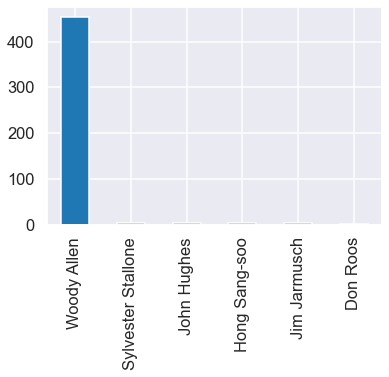

In [46]:
#writer who have written many movies
new.writer.value_counts()[:6].plot.bar()

#### Woody Allen happens to have written many movies

<AxesSubplot:>

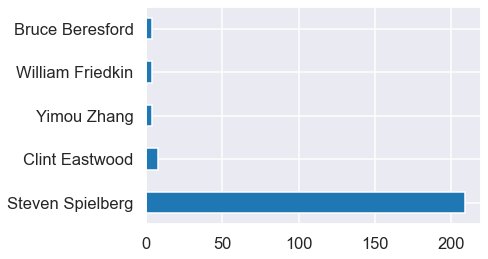

In [47]:
#director who have directed many movies
new.director.value_counts()[:5].plot.barh()

### Steven Spielberg has directed many movies




## 4.Finding most preferred movie language

In [48]:
#load the data and displaying the first five rows
reviews = pd.read_csv('zippedData/tmdb.movies.csv')
reviews.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [49]:
#The language with high value counts in the movies
language = reviews['original_language'].value_counts()[:5]
language

en    23291
fr      507
es      455
ru      298
ja      265
Name: original_language, dtype: int64

In [50]:
#checking missing values
reviews.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

<AxesSubplot:>

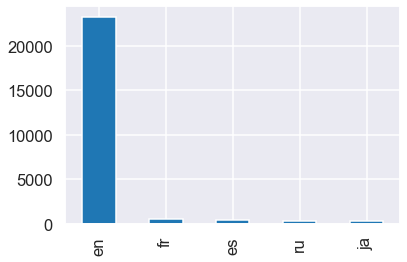

In [51]:
#plotting a bar graph 
language.plot.bar()

### from the above visualisation it is evident that most viewers like english movies

# Recommendations 
#### Based on the above data Analysis I recoomend microsoft to:

#### 1.Release comedy movies, horror movies, crime movies and family movies in order for them to gain high profit 
#### 2.Release movies in the month of April, may, june and December because to in order to yield high profit, most people are likely to be on holidays watching and enjoying the stated movies genres
#### 3.Hire writers who have written alot of movies because they have got experience.
#### 4.Hire directors who have directed many movies since they have got experience.
#### 5.The most liked movie language is English 